In [255]:
 #import libraries
import numpy as np 
import pandas as pd
from IPython.display import display 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from scipy.stats import kstest
from scipy.stats import shapiro

Data = pd.read_csv('C:/Users/SurendranSelvaraju/Documents/WorkAssign/PreScreen_r320062022/ing.csv')

# Data Exploration 

In [231]:
 # view first 5 rows of the table
Data.head()

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00


In [232]:
 # view first 5 rows of the table
Data.tail()

,a,b,c,d,e,f,g,h,i
209,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16
210,1.51848,13.64,3.87,1.27,71.96,0.54,8.32,0.0,0.32
211,1.51784,12.68,3.67,1.16,73.11,0.61,8.70,0.0,0.00
212,1.51841,12.93,3.74,1.11,72.28,0.64,8.96,0.0,0.22
213,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.0,0.00


In [233]:
#check for missing values in the table; Thare are no missing value in the data.
Data.isnull().sum()*100/len(Data)

a    0.0
b    0.0
c    0.0
d    0.0
e    0.0
f    0.0
g    0.0
h    0.0
i    0.0
dtype: float64

> All the features are numeric.

> There a no missing data.

In [234]:
#Analyze descriptive statistic; All the features in the table are in numerical form
Data.describe() 


,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


> Mean and median of the formulation are close to each other and the variance of each of the formulation are not much except for "c" and "g"

# Analyse discrete and continuous variable

In [235]:
#Check the occurance of discreet and continuous variables

variables = [var for var in Data.columns if Data[var].dtypes != 'O']

discrete_var = [var for var in variables if len(Data[var].unique())<20]

print('Number of discrete variables: ', len(discrete_var))


Number of discrete variables:  0


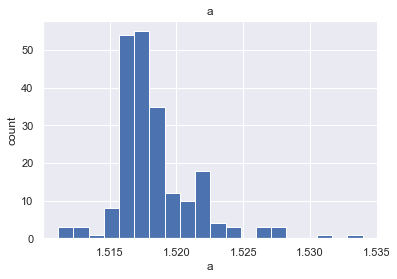

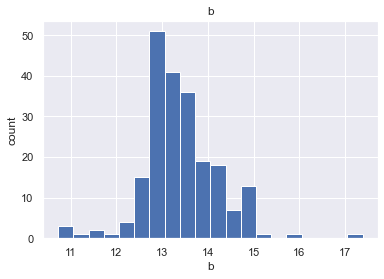

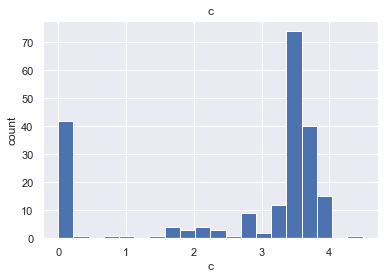

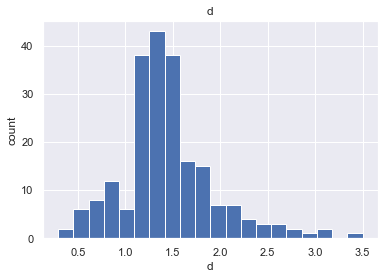

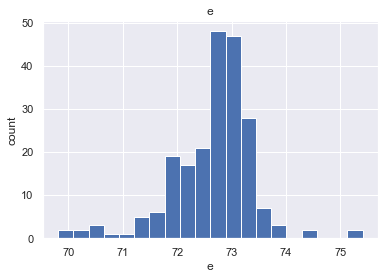

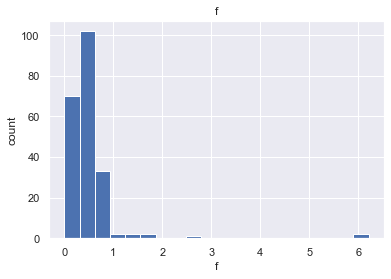

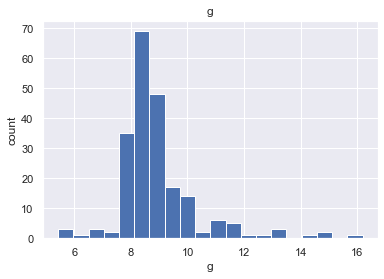

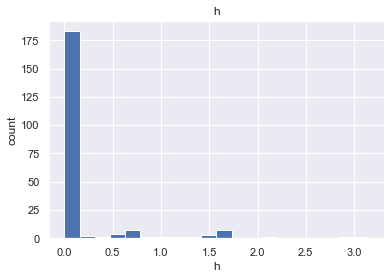

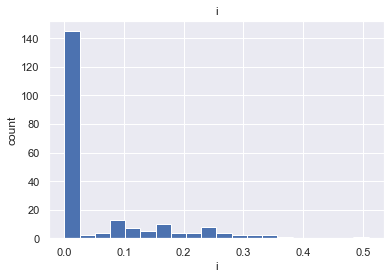

In [236]:
#View the distributation of the continuous variables using histogram

def continous_var(data, var):
    data = data.copy()
    data[var].hist(bins=20)
    plt.ylabel('count')
    plt.xlabel(var)
    plt.title(var)
    plt.show()
    
for var in variables:
    continous_var(Data, var)

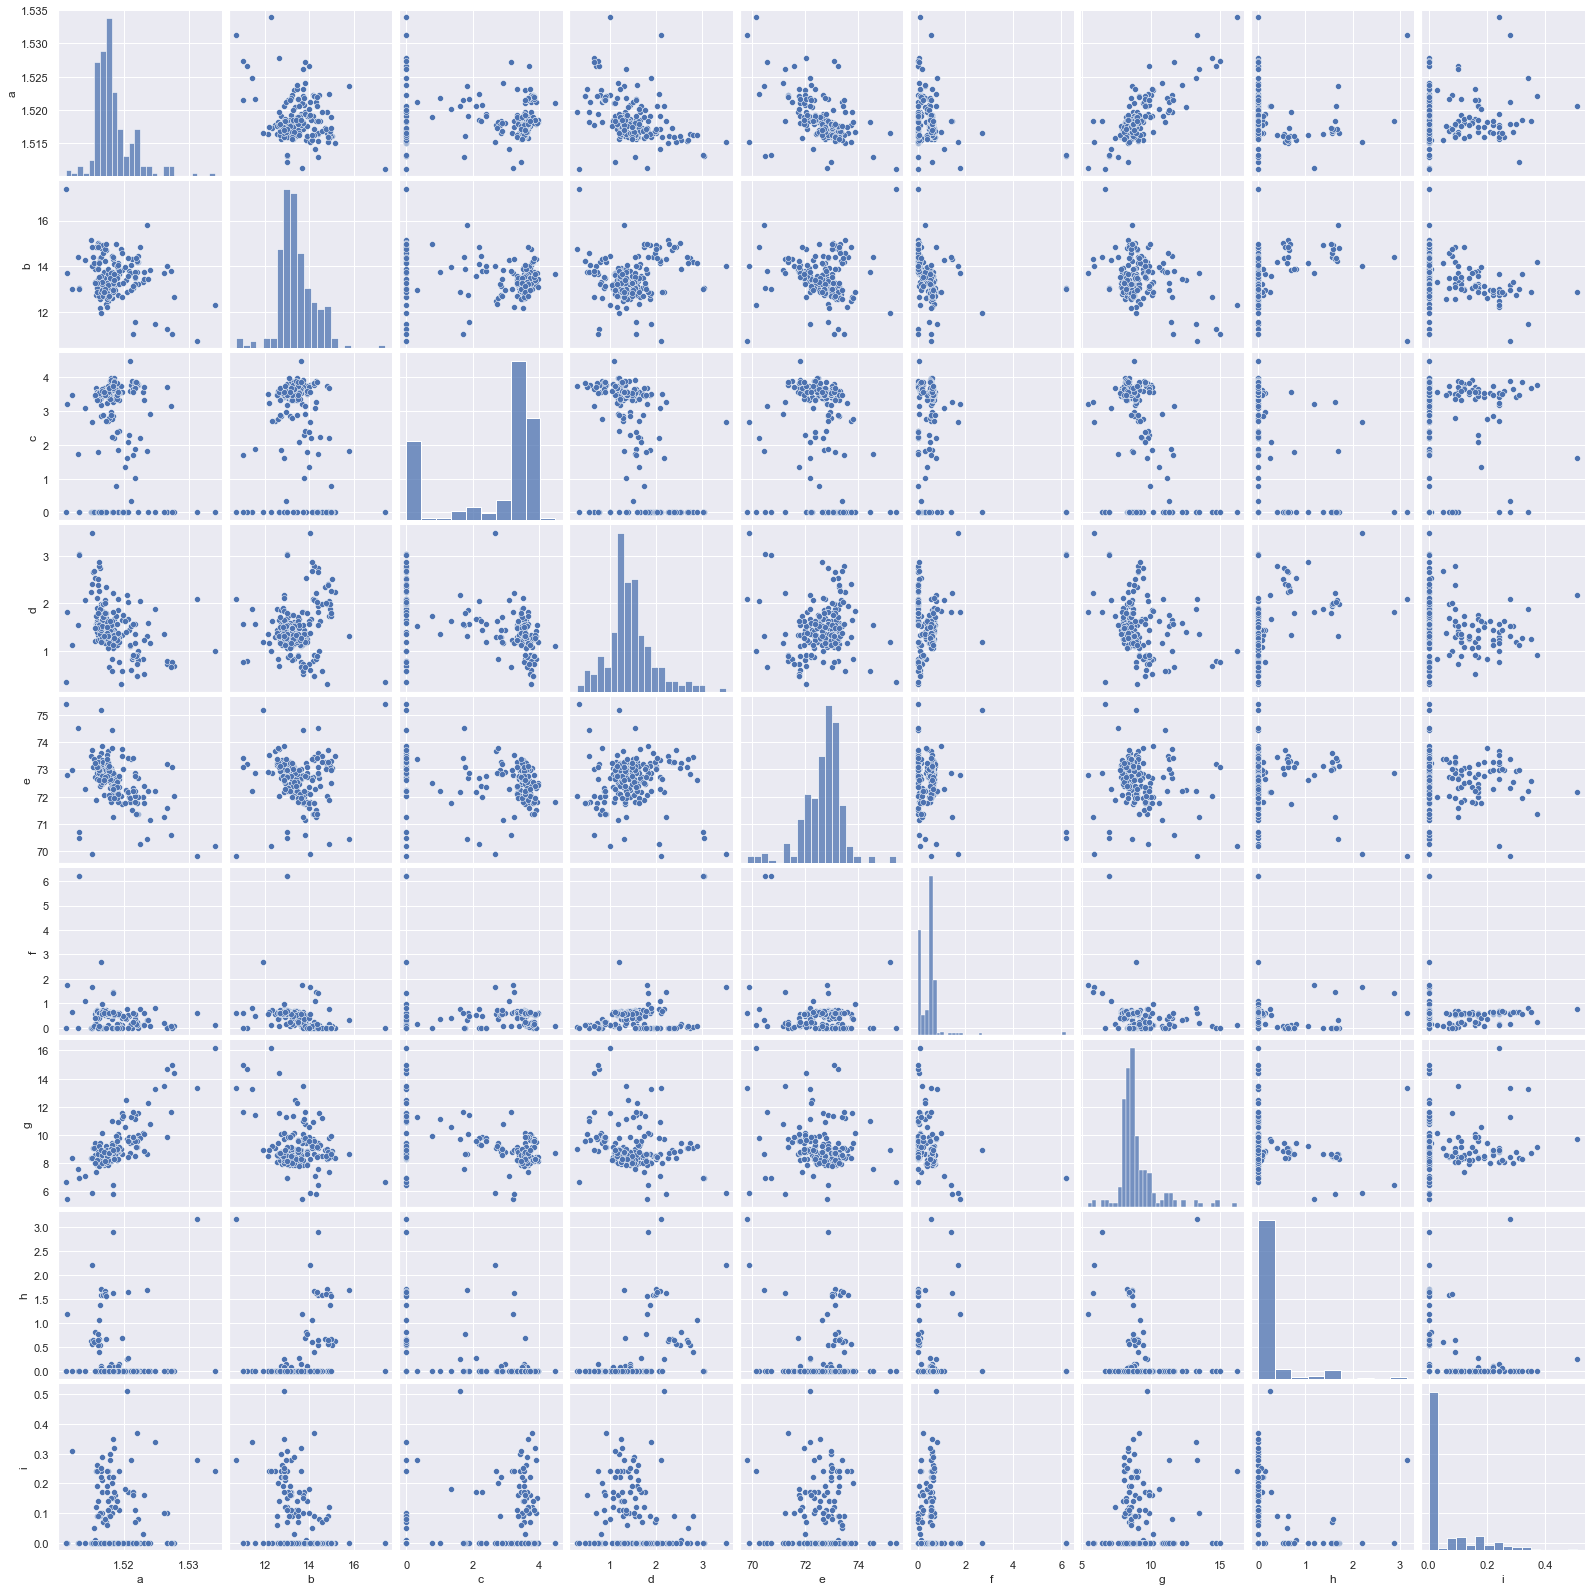

In [237]:
#View the relationships of the variables using pairplot
sns.pairplot(Data)
plt.show()

All the features are normally distributed except for f, h, i, We can further investigated this 


We can use Shapiro-Wilk Test, Jarque-Bera test and Kolmogorov-Smirnov test to test the features normality

In [252]:
# Shapiro-Wilk Test
stat, p = shapiro(Data['a'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.868, p=0.000
Sample does not look Gaussian (reject H0)


In [253]:

# Jarque–Bera test
result = (jarque_bera(Data['a']))

print(f"JB statistic: {result[0]}")
print(f"p-value: {result[1]}")

JB statistic: 297.44298849265556
p-value: 0.0


In [254]:
#Kolmogorov-Smirnov test 
result = (kstest(Data['a'], cdf='norm'))

print(f"K-S statistic: {result[0]}")
print(f"p-value: {result[1]}")

K-S statistic: 0.9346248809556682
p-value: 6.3021204297293944e-254


In [267]:
#looping Kolmogorov-Smirnov test to all the features in the dataframe

columns = Data.columns
alpha = 0.05

for i in columns:
    print([i])
    a,b = (kstest(Data[i], cdf='norm'))
    print(a,b)
    if b < alpha:
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")


['a']
0.9346248809556682 6.3021204297293944e-254
The null hypothesis can be rejected
['b']
1.0 0.0
The null hypothesis can be rejected
['c']
0.7367408952516691 1.3800828819793003e-119
The null hypothesis can be rejected
['d']
0.7129540277362536 2.2403643319803306e-110
The null hypothesis can be rejected
['e']
1.0 0.0
The null hypothesis can be rejected
['f']
0.5 5.370323748446885e-50
The null hypothesis can be rejected
['g']
0.9999999718229741 0.0
The null hypothesis can be rejected
['h']
0.5 5.370323748446885e-50
The null hypothesis can be rejected
['i']
0.5 5.370323748446885e-50
The null hypothesis can be rejected


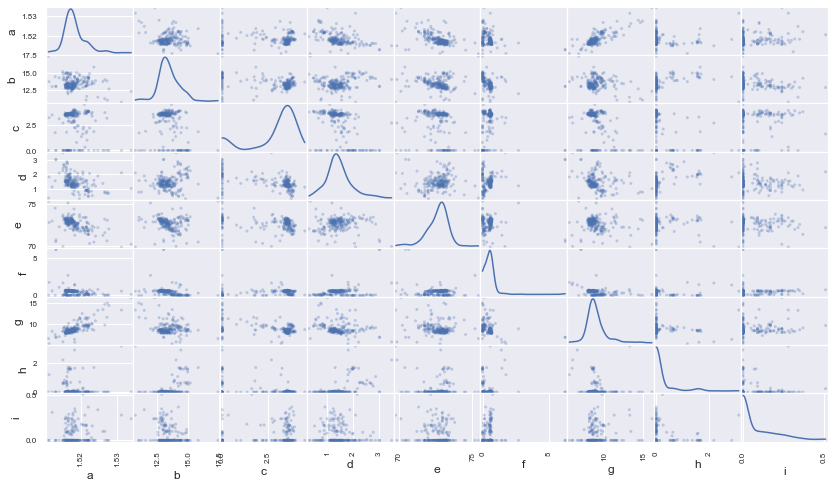

In [187]:
#View the Data distributation using scatterplot

from pandas.plotting import scatter_matrix
scatter_matrix(Data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

<AxesSubplot:>

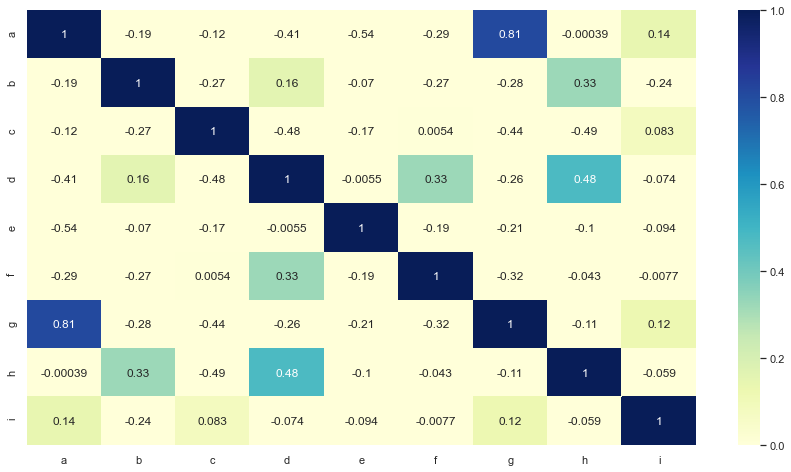

In [188]:
#View the data correlation using heatmap

import seaborn as sns

sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(Data.corr(), vmin=0, vmax=1, annot=True, cmap='YlGnBu')

From the scatter plots and the heatmap of correlation, we can see that there is a strong correlation between the ‘a’ and ‘g’ features. The features ‘d’ and ‘h’ also show a good degree of correlation.

Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as MultiColinearity as both of them contains almost the same information. MultiColinearity is bad for Machine Learning model.

The presence of correlated variable does not provide any unique or new information to statistical analysis. In fact, it may cause analysis or statistical inference about the data to be less reliable by making the coefficients unstable.

All the features are normally distributed except for f, h, i. In addiction, a & g are strong positively corelated and e & a are strong negatively corelated.


Summary:

All the features are normally distributed except for f, h, i.
a & g are highly positively corelated and e & a are highly negatively corelated

In [189]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       214 non-null    float64
 1   b       214 non-null    float64
 2   c       214 non-null    float64
 3   d       214 non-null    float64
 4   e       214 non-null    float64
 5   f       214 non-null    float64
 6   g       214 non-null    float64
 7   h       214 non-null    float64
 8   i       214 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB


# Clustering

In [190]:
X = Data.copy()

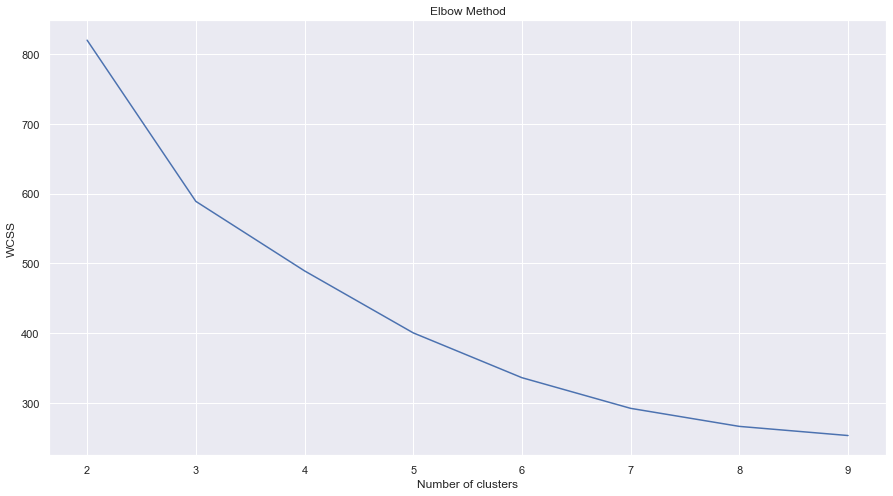

In [191]:
#Use elbow method to find the optimum number of clusters.

wcss = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k, and choose the k for which WSS first starts to diminish. In the plot of WSS-versus k, this is visible as an elbow.

The optimal K value is found to be 3 using the elbow method.

In [212]:
scores = {}
for i in range (2, 20):
    print('Number of clusters: ' + str(i))
        
    # Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(random_state=42, n_components=i)
    clusterer.fit(X)

    # Predict the cluster for each data point
    preds = clusterer.predict(X)

    # Find the cluster centers
    centers = clusterer.means_
    #print('Cluster Center: ' + str(centers))

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(X, preds)
    scores[i] = score
    #print('Silhouette score is: ' + str(score), '\n')
    
#print('Scores: ' + str(scores))
    print ("For i = {}. The average silhouette_score is : {}".format(i, score))

Number of clusters: 2
For i = 2. The average silhouette_score is : 0.43989563073900523
Number of clusters: 3
For i = 3. The average silhouette_score is : 0.46843097238197845
Number of clusters: 4
For i = 4. The average silhouette_score is : 0.3506484301371557
Number of clusters: 5
For i = 5. The average silhouette_score is : 0.3226402004864172
Number of clusters: 6
For i = 6. The average silhouette_score is : 0.41428685404958143
Number of clusters: 7
For i = 7. The average silhouette_score is : 0.3928921444475848
Number of clusters: 8
For i = 8. The average silhouette_score is : 0.37800463835022863
Number of clusters: 9
For i = 9. The average silhouette_score is : 0.24748043262986144
Number of clusters: 10
For i = 10. The average silhouette_score is : 0.2423474361929793
Number of clusters: 11
For i = 11. The average silhouette_score is : 0.23689258810135116
Number of clusters: 12
For i = 12. The average silhouette_score is : 0.24476865400817502
Number of clusters: 13
For i = 13. The av

In [192]:
#kmeans model

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)

In [193]:
pred_y

array([0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       2, 0, 1, 1, 0, 2, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1, 0,
       0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2])

In [194]:
#convert the prediction array to pandas

Data['predictions'] = pd.DataFrame(pred_y)

In [195]:
#View the first 5 rows

Data.head()

,a,b,c,d,e,f,g,h,i,predictions
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07,0
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,1
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,0
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00,0
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00,0


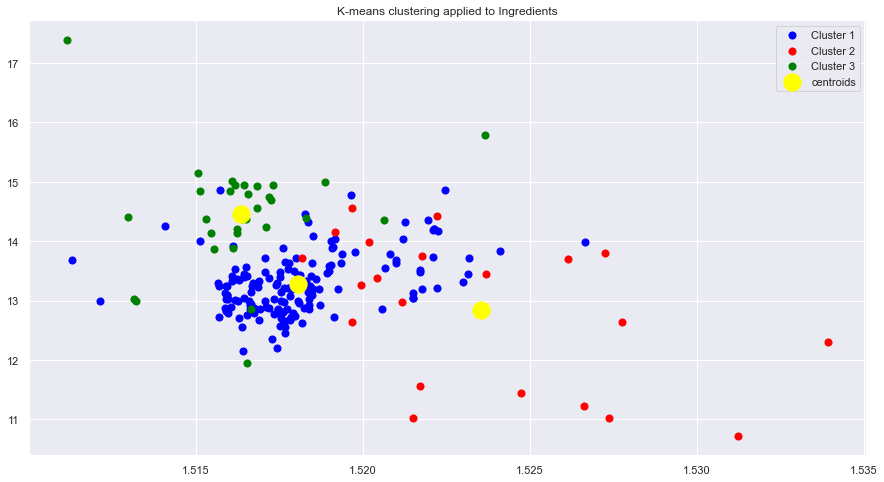

In [198]:
#visualize the clusters and their centroids 

plt.figure(2)
plt.scatter(X.iloc[pred_y == 0, 0], X.iloc[pred_y == 0, 1], s = 50, c = 'blue', label = 'Cluster 1')
plt.scatter(X.iloc[pred_y == 1, 0], X.iloc[pred_y == 1, 1], s = 50, c = 'red', label = 'Cluster 2')
plt.scatter(X.iloc[pred_y == 2, 0], X.iloc[pred_y == 2, 1], s = 50, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'centroids' )
plt.title("K-means clustering applied to Ingredients")
plt.legend()
plt.show()

Lets try to scale the variables using MinMaxScaler and see we can improve the results

In [268]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y = kmeans.fit_predict(X_scaled)

In [269]:
Data['predictions_'] = pd.DataFrame(y)

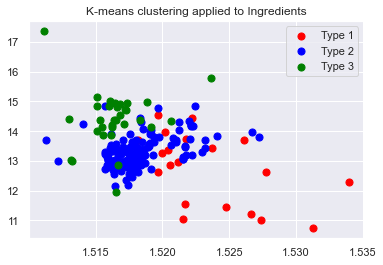

In [274]:
#Lets visualize the clusters

plt.figure(2)
plt.scatter(Data.iloc[y == 0, 0], Data.iloc[y == 0, 1], s = 50, c = 'red', label = 'Type 1')
plt.scatter(Data.iloc[y == 1, 0], Data.iloc[y == 1, 1], s = 50, c = 'blue', label = 'Type 2')
plt.scatter(Data.iloc[y == 2, 0], Data.iloc[y == 2, 1], s = 50, c = 'green', label = 'Type 3')

plt.title("K-means clustering applied to Ingredients")

plt.legend()
plt.show()

There is no significant changes for the clustering result after MinMaxScaler.